## Mapping poverty and inequality in Ghana

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import requests
%pylab inline
import seaborn as sns
import mplleaflet as mpll
import geopandas as gpd
import osmnx as ox
from IPython.display import Image
from IPython import display
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt2
from shapely.geometry import Point
import pylab as plt
import plotly.graph_objects as go
import plotly.express as px
import re
import mailbox
import csv

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
gh_districts = gpd.read_file('shapefiles/Map_of_Districts_216.shp') # source: https://data.gov.gh/dataset/shapefiles-all-districts-ghana-2012-216-districts

In [3]:
df = pd.read_csv('Ghana district poverty 2015.csv')

In [4]:
pop = df.groupby('District').mean()[['Population']]
poor_num = df.groupby('District').mean()[['Estimated number of poor persons']]
poverty = df.groupby('District').mean()[['Poverty head count (P0)']]
gini = df.groupby('District').mean()[['Gini coefficient']]
pov_depth = df.groupby('District').mean()[['Poverty depth (P1)']]
pov_sev = df.groupby('District').mean()[['Poverty severity (P2)']]

In [5]:
# Create a new geodataframe comprising 10 merged polygons
districts = gh_districts.dissolve(by = 'LABEL')
districts.shape

(216, 10)

In [6]:
pov_depth = pd.merge(districts, pov_depth, left_index=True, right_index=True)
pov_depth = gpd.GeoDataFrame(pov_depth)

pov_sev = pd.merge(districts, pov_sev, left_index=True, right_index=True)
pov_sev = gpd.GeoDataFrame(pov_sev)

poor_num = pd.merge(districts, poor_num, left_index=True, right_index=True)
poor_num = gpd.GeoDataFrame(poor_num)

poverty = pd.merge(districts, poverty, left_index=True, right_index=True)
poverty = gpd.GeoDataFrame(poverty)

gini = pd.merge(districts, gini, left_index=True, right_index=True)
gini = gpd.GeoDataFrame(gini)

### Poverty rates

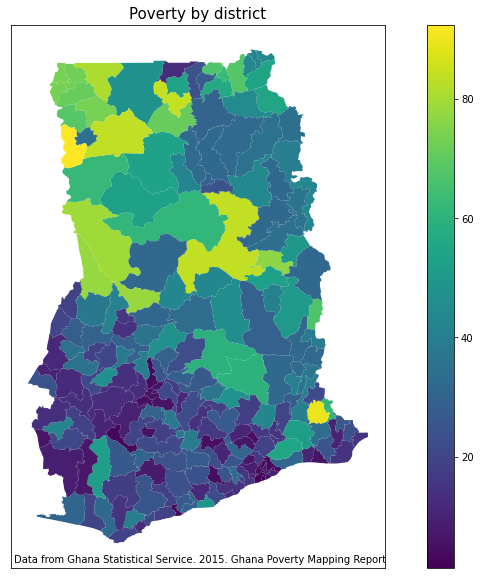

In [15]:
poverty.plot(column = 'Poverty head count (P0)', legend = True, figsize = [15,10])
plt.title('Poverty by district', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Estimated number of poor persons

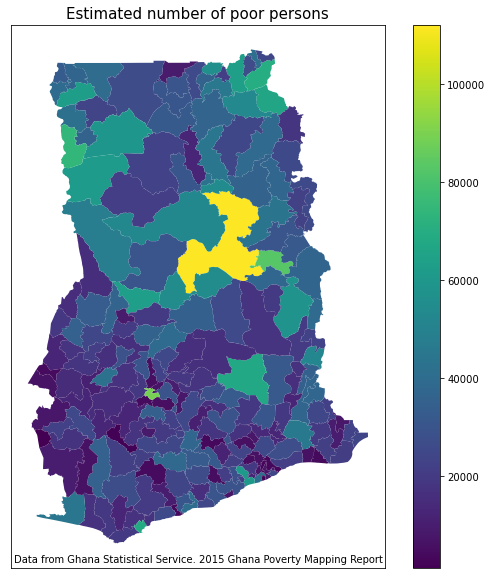

In [16]:
poor_num.plot(column = 'Estimated number of poor persons', legend = True, figsize = [10,10])
plt.title('Estimated number of poor persons', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Poverty depth (P1)

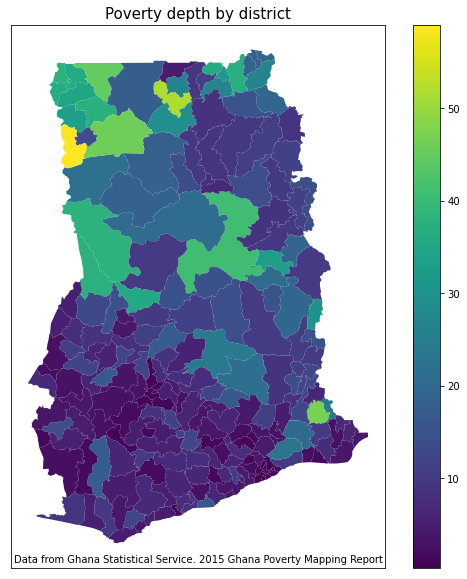

In [17]:
pov_depth.plot(column = 'Poverty depth (P1)', legend = True, figsize = [10,10])
plt.title('Poverty depth by district', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Poverty severity (P2)

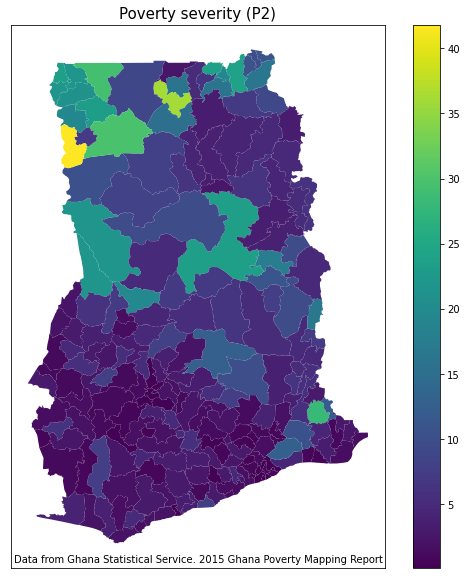

In [18]:
pov_sev.plot(column = 'Poverty severity (P2)', legend = True, figsize = [10,10])
plt.title('Poverty severity (P2)', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

### Gini coefficient

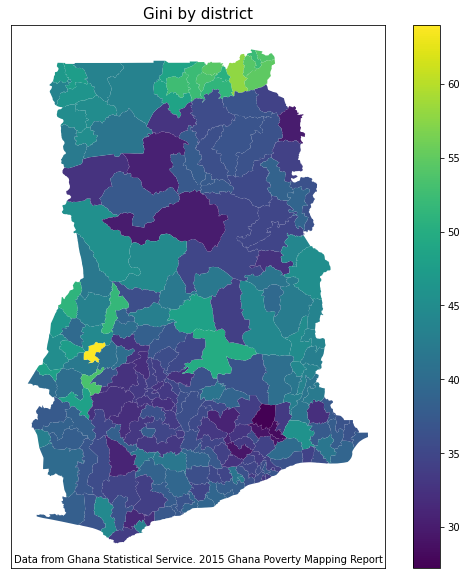

In [19]:
gini.plot(column = 'Gini coefficient', legend = True, figsize = [10,10])
plt.title('Gini by district', fontdict={'fontsize': 15});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Data from Ghana Statistical Service. 2015 Ghana Poverty Mapping Report', xy=(0.01, 0.025), size=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()

In [ ]:
jupyter nbconvert povertymapping.ipynb --TemplateExporter.exclude_input=True